# Load & Inspect MHEALTH Dataset
Download, unzip, and display basic information about the raw sensor files.

In [1]:
import os
import requests
import zipfile
import pandas as pd
import numpy as np

def download_mhealth_dataset(url: str, save_path: str):
    """
    Downloads the MHEALTH dataset from the given URL 
    and saves it to `save_path`.
    """
    if not os.path.exists(save_path):
        print(f"Downloading MHEALTH dataset from {url}...")
        r = requests.get(url, stream=True)
        with open(save_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024):
                if chunk:
                    f.write(chunk)
        print("Download complete.")
    else:
        print("Dataset zip file already exists. Skipping download.")

def unzip_dataset(zip_path: str, extract_to: str):
    """
    Unzips the downloaded dataset to the specified folder.
    """
    if not os.path.exists(extract_to):
        os.makedirs(extract_to)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Extracted dataset to: {extract_to}")

# URL and local paths
mhealth_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip"
zip_filename = "MHEALTHDATASET.zip"
extract_folder = "MHEALTHDATASET"

# 1) Download the dataset if not already present
download_mhealth_dataset(mhealth_url, zip_filename)

# 2) Unzip the dataset
unzip_dataset(zip_filename, extract_folder)


Dataset zip file already exists. Skipping download.
Extracted dataset to: MHEALTHDATASET


In [2]:
import glob

# Your top-level folder after unzipping
extract_folder = "MHEALTHDATASET"

# Path to the second-level folder containing the .log files
nested_folder = os.path.join(extract_folder, "MHEALTHDATASET")

# Verify which files/folders exist
print("Contents of top-level folder:", os.listdir(extract_folder))
print("Contents of nested folder:", os.listdir(nested_folder))

# Now collect all .log files
file_list = sorted(glob.glob(os.path.join(nested_folder, "mHealth_subject*.log")))

if not file_list:
    print("No .log files found. Check that the folder structure is correct.")
else:
    print("Found log files:", file_list)

# Define the column names based on the dataset description
column_names = [
    "chest_acc_x",
    "chest_acc_y",
    "chest_acc_z",
    "ecg_1",
    "ecg_2",
    "ankle_acc_x",
    "ankle_acc_y",
    "ankle_acc_z",
    "ankle_gyro_x",
    "ankle_gyro_y",
    "ankle_gyro_z",
    "ankle_mag_x",
    "ankle_mag_y",
    "ankle_mag_z",
    "arm_acc_x",
    "arm_acc_y",
    "arm_acc_z",
    "arm_gyro_x",
    "arm_gyro_y",
    "arm_gyro_z",
    "arm_mag_x",
    "arm_mag_y",
    "arm_mag_z",
    "activity_label"
]

all_data = []
for log_file in file_list:
    print("Loading file:", log_file)
    df = pd.read_csv(log_file, 
                     delim_whitespace=True, 
                     names=column_names, 
                     header=None)
    
    # Add a subject column for clarity.
    # e.g. "mHealth_subject1.log" => "subject1"
    subject_id = os.path.splitext(os.path.basename(log_file))[0]  # "mHealth_subject1"
    df["subject_id"] = subject_id
    
    all_data.append(df)

# Concatenate all subject data
if all_data:
    mhealth_df = pd.concat(all_data, ignore_index=True)
    print("Combined DataFrame shape:", mhealth_df.shape)
    print(mhealth_df.head())
else:
    print("No data loaded; all_data is empty.")


Contents of top-level folder: ['MHEALTHDATASET']
Contents of nested folder: ['mHealth_subject1.log', 'mHealth_subject10.log', 'mHealth_subject2.log', 'mHealth_subject3.log', 'mHealth_subject4.log', 'mHealth_subject5.log', 'mHealth_subject6.log', 'mHealth_subject7.log', 'mHealth_subject8.log', 'mHealth_subject9.log', 'README.txt']
Found log files: ['MHEALTHDATASET\\MHEALTHDATASET\\mHealth_subject1.log', 'MHEALTHDATASET\\MHEALTHDATASET\\mHealth_subject10.log', 'MHEALTHDATASET\\MHEALTHDATASET\\mHealth_subject2.log', 'MHEALTHDATASET\\MHEALTHDATASET\\mHealth_subject3.log', 'MHEALTHDATASET\\MHEALTHDATASET\\mHealth_subject4.log', 'MHEALTHDATASET\\MHEALTHDATASET\\mHealth_subject5.log', 'MHEALTHDATASET\\MHEALTHDATASET\\mHealth_subject6.log', 'MHEALTHDATASET\\MHEALTHDATASET\\mHealth_subject7.log', 'MHEALTHDATASET\\MHEALTHDATASET\\mHealth_subject8.log', 'MHEALTHDATASET\\MHEALTHDATASET\\mHealth_subject9.log']
Loading file: MHEALTHDATASET\MHEALTHDATASET\mHealth_subject1.log


C:\Users\DevinJ\AppData\Local\Temp\ipykernel_33816\2647223428.py:52: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(log_file,


Loading file: MHEALTHDATASET\MHEALTHDATASET\mHealth_subject10.log


C:\Users\DevinJ\AppData\Local\Temp\ipykernel_33816\2647223428.py:52: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(log_file,


Loading file: MHEALTHDATASET\MHEALTHDATASET\mHealth_subject2.log


C:\Users\DevinJ\AppData\Local\Temp\ipykernel_33816\2647223428.py:52: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(log_file,


Loading file: MHEALTHDATASET\MHEALTHDATASET\mHealth_subject3.log


C:\Users\DevinJ\AppData\Local\Temp\ipykernel_33816\2647223428.py:52: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(log_file,


Loading file: MHEALTHDATASET\MHEALTHDATASET\mHealth_subject4.log


C:\Users\DevinJ\AppData\Local\Temp\ipykernel_33816\2647223428.py:52: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(log_file,


Loading file: MHEALTHDATASET\MHEALTHDATASET\mHealth_subject5.log


C:\Users\DevinJ\AppData\Local\Temp\ipykernel_33816\2647223428.py:52: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(log_file,


Loading file: MHEALTHDATASET\MHEALTHDATASET\mHealth_subject6.log


C:\Users\DevinJ\AppData\Local\Temp\ipykernel_33816\2647223428.py:52: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(log_file,


Loading file: MHEALTHDATASET\MHEALTHDATASET\mHealth_subject7.log


C:\Users\DevinJ\AppData\Local\Temp\ipykernel_33816\2647223428.py:52: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(log_file,


Loading file: MHEALTHDATASET\MHEALTHDATASET\mHealth_subject8.log


C:\Users\DevinJ\AppData\Local\Temp\ipykernel_33816\2647223428.py:52: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(log_file,


Loading file: MHEALTHDATASET\MHEALTHDATASET\mHealth_subject9.log


C:\Users\DevinJ\AppData\Local\Temp\ipykernel_33816\2647223428.py:52: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(log_file,


Combined DataFrame shape: (1215745, 25)
   chest_acc_x  chest_acc_y  chest_acc_z     ecg_1     ecg_2  ankle_acc_x  \
0      -9.8184     0.009971      0.29563  0.004186  0.004186       2.1849   
1      -9.8489     0.524040      0.37348  0.004186  0.016745       2.3876   
2      -9.6602     0.181850      0.43742  0.016745  0.037677       2.4086   
3      -9.6507     0.214220      0.24033  0.079540  0.117220       2.1814   
4      -9.7030     0.303890      0.31156  0.221870  0.205130       2.4173   

   ankle_acc_y  ankle_acc_z  ankle_gyro_x  ankle_gyro_y  ...  arm_acc_y  \
0      -9.6967      0.63077      0.103900      -0.84053  ...    -4.5781   
1      -9.5080      0.68389      0.085343      -0.83865  ...    -4.3198   
2      -9.5674      0.68113      0.085343      -0.83865  ...    -4.2772   
3      -9.4301      0.55031      0.085343      -0.83865  ...    -4.3163   
4      -9.3889      0.71098      0.085343      -0.83865  ...    -4.1459   

   arm_acc_z  arm_gyro_x  arm_gyro_y  arm_gyro

# Data Cleaning & Standardisation
Handle missing values, and scale all sensor channels to zero-mean/unit-variance.

In [3]:
# Check for missing values
missing_counts = mhealth_df.isnull().sum()
print("Missing values per column:\n", missing_counts)


Missing values per column:
 chest_acc_x       0
chest_acc_y       0
chest_acc_z       0
ecg_1             0
ecg_2             0
ankle_acc_x       0
ankle_acc_y       0
ankle_acc_z       0
ankle_gyro_x      0
ankle_gyro_y      0
ankle_gyro_z      0
ankle_mag_x       0
ankle_mag_y       0
ankle_mag_z       0
arm_acc_x         0
arm_acc_y         0
arm_acc_z         0
arm_gyro_x        0
arm_gyro_y        0
arm_gyro_z        0
arm_mag_x         0
arm_mag_y         0
arm_mag_z         0
activity_label    0
subject_id        0
dtype: int64


In [4]:
from sklearn.preprocessing import StandardScaler

# Columns to scale (exclude label & subject_id)
feature_cols = [
    col for col in mhealth_df.columns 
    if col not in ['activity_label', 'subject_id']
]

scaler = StandardScaler()
mhealth_df[feature_cols] = scaler.fit_transform(mhealth_df[feature_cols])

print("Scaled feature sample:\n", mhealth_df[feature_cols].head())


Scaled feature sample:
    chest_acc_x  chest_acc_y  chest_acc_z     ecg_1     ecg_2  ankle_acc_x  \
0    -0.318024     0.104711     0.378153  0.012468  0.011956     0.180505   
1    -0.325508     0.345048     0.399934  0.012468  0.029230     0.233478   
2    -0.279204     0.185068     0.417824  0.029289  0.058021     0.238966   
3    -0.276873     0.200201     0.362681  0.113398  0.167428     0.179590   
4    -0.289707     0.242124     0.382610  0.304036  0.288343     0.241240   

   ankle_acc_y  ankle_acc_z  ankle_gyro_x  ankle_gyro_y  ...  ankle_mag_z  \
0    -0.000916     0.290303      0.214771     -0.631339  ...     0.065390   
1     0.044322     0.300028      0.176993     -0.626038  ...     0.081415   
2     0.030081     0.299523      0.176993     -0.626038  ...     0.073245   
3     0.062997     0.275571      0.176993     -0.626038  ...     0.081004   
4     0.072874     0.304988      0.176993     -0.626038  ...     0.073660   

   arm_acc_x  arm_acc_y  arm_acc_z  arm_gyro_x  ar

# Windowing Sensor Streams
Slice continuous data into fixed-length windows (e.g., 100 samples) and assign a label via majority vote or last sample.

In [5]:
WINDOW_SIZE = 100  # e.g., 2 seconds if data is 50 Hz

def create_windows(df, window_size=100):
    """
    Splits the dataset into consecutive windows of length `window_size`.
    Each window is assigned a single label based on majority labeling.
    """
    # Sort to maintain temporal order within each subject
    df = df.sort_values(by=['subject_id']).reset_index(drop=True)
    
    feature_cols = [c for c in df.columns if c not in ['activity_label', 'subject_id']]
    data_array = df[feature_cols].values
    labels = df['activity_label'].values
    subjects = df['subject_id'].values
    
    X_windows = []
    y_windows = []
    subject_windows = []
    
    start_idx = 0
    while start_idx + window_size <= len(df):
        end_idx = start_idx + window_size
        
        # Slice data for this window
        window_data = data_array[start_idx:end_idx]
        window_labels = labels[start_idx:end_idx]
        window_subjects = subjects[start_idx:end_idx]
        
        # Majority vote for the label
        unique_labels, counts = np.unique(window_labels, return_counts=True)
        majority_label = unique_labels[np.argmax(counts)]
        
        X_windows.append(window_data)
        y_windows.append(majority_label)
        
        # (Optional) track subject
        unique_subj, subj_counts = np.unique(window_subjects, return_counts=True)
        majority_subj = unique_subj[np.argmax(subj_counts)]
        subject_windows.append(majority_subj)
        
        start_idx = end_idx  # move on (no overlap)
    
    X_windows = np.array(X_windows)  # shape (num_windows, window_size, num_features)
    y_windows = np.array(y_windows)
    subject_windows = np.array(subject_windows)
    
    return X_windows, y_windows, subject_windows

X, y, subj_ids = create_windows(mhealth_df, window_size=WINDOW_SIZE)
print("X shape:", X.shape)  # (num_windows, 100, num_features)
print("y shape:", y.shape)  # (num_windows,)
print("Sample label distribution:", np.unique(y, return_counts=True))


X shape: (12157, 100, 23)
y shape: (12157,)
Sample label distribution: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64), array([8727,  301,  307,  313,  307,  306,  283,  289,  296,  308,  306,
        308,  106], dtype=int64))


# Train / Validation / Test Split
Create stratified splits to ensure each activity appears in every partition.

In [6]:
from sklearn.model_selection import train_test_split

# Random split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("Train size:", X_train.shape, y_train.shape)
print("Val size:", X_val.shape, y_val.shape)
print("Test size:", X_test.shape, y_test.shape)


Train size: (8509, 100, 23) (8509,)
Val size: (1824, 100, 23) (1824,)
Test size: (1824, 100, 23) (1824,)


# PyTorch Dataset & DataLoader
Wrap window arrays in a custom Dataset and initialise DataLoaders for efficient batching.

In [7]:
import torch
from torch.utils.data import Dataset, DataLoader

class SensorWindowDataset(Dataset):
    def __init__(self, X, y):
        # Convert to torch tensors
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create Dataset objects
train_dataset = SensorWindowDataset(X_train, y_train)
val_dataset = SensorWindowDataset(X_val, y_val)
test_dataset = SensorWindowDataset(X_test, y_test)

# Dataloaders
BATCH_SIZE = 64

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Quick sanity check
xb, yb = next(iter(train_loader))
print("Batch X shape:", xb.shape)  # (batch_size, window_size, num_features)
print("Batch y shape:", yb.shape)





Batch X shape: torch.Size([64, 100, 23])
Batch y shape: torch.Size([64])


# LSTM Model Definition & Training Loop
Build a sequential LSTM followed by a fully-connected layer for multi-class activity classification.

Train the LSTM for n epochs, tracking loss and accuracy on both training and validation sets.

In [8]:
import torch.nn as nn
import torch.nn.functional as F

class LSTMActivityClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_layers=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True  # input shape: (batch, seq, feature)
        )
        
        # Final fully connected for classification
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # x shape: (batch, seq_len, input_size)
        # hidden/cell state are automatically initialized to zeros if not provided
        lstm_out, (hn, cn) = self.lstm(x)  # (batch, seq_len, hidden_size), ([num_layers, batch, hidden_size], ...)
        
        # We can take the last time-step's output
        # lstm_out[:, -1, :] shape = (batch, hidden_size)
        out = lstm_out[:, -1, :]
        
        # FC layer for classification
        out = self.fc(out)  # (batch, num_classes)
        return out


In [9]:
num_classes = len(np.unique(y_train))  # number of distinct activity labels
input_size = X_train.shape[2]         # number of sensor features
hidden_size = 64
num_layers = 1

model = LSTMActivityClassifier(input_size, hidden_size, num_classes, num_layers)
print(model)


LSTMActivityClassifier(
  (lstm): LSTM(23, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=13, bias=True)
)


In [10]:
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

def train_one_epoch(model, train_loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * X_batch.size(0)
        
        _, preds = torch.max(outputs, 1)
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)
    
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

def evaluate(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            
            running_loss += loss.item() * X_batch.size(0)
            
            _, preds = torch.max(outputs, 1)
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)
    
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

# -- Main training loop --
EPOCHS = 10
for epoch in range(EPOCHS):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion)
    val_loss, val_acc = evaluate(model, val_loader, criterion)
    
    print(f"Epoch [{epoch+1}/{EPOCHS}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")


Using device: cuda
Epoch [1/10] Train Loss: 1.4157, Train Acc: 0.6718 | Val Loss: 1.0552, Val Acc: 0.7325
Epoch [2/10] Train Loss: 0.9605, Train Acc: 0.7411 | Val Loss: 0.8699, Val Acc: 0.7527
Epoch [3/10] Train Loss: 0.8189, Train Acc: 0.7668 | Val Loss: 0.7729, Val Acc: 0.7560
Epoch [4/10] Train Loss: 0.7466, Train Acc: 0.7747 | Val Loss: 0.8015, Val Acc: 0.7725
Epoch [5/10] Train Loss: 0.7073, Train Acc: 0.7772 | Val Loss: 0.6558, Val Acc: 0.7747
Epoch [6/10] Train Loss: 0.6384, Train Acc: 0.7889 | Val Loss: 0.6274, Val Acc: 0.7758
Epoch [7/10] Train Loss: 0.7588, Train Acc: 0.7497 | Val Loss: 0.7195, Val Acc: 0.7692
Epoch [8/10] Train Loss: 0.6315, Train Acc: 0.7800 | Val Loss: 0.5921, Val Acc: 0.7862
Epoch [9/10] Train Loss: 0.5708, Train Acc: 0.7900 | Val Loss: 0.5561, Val Acc: 0.7895
Epoch [10/10] Train Loss: 0.5367, Train Acc: 0.8009 | Val Loss: 0.5301, Val Acc: 0.7900


# LSTM Evaluation
Generate predictions on the test set and print the classification report and raw confusion matrix.

In [15]:
# -----------------------------------------------
# Activity labels in the order of their numeric IDs
# (adjust if you excluded the null class or re-indexed)
# -----------------------------------------------
class_names = [
    "Null / Transition",   # 0
    "Standing still",      # 1
    "Sitting",             # 2
    "Lying down",          # 3
    "Walking",             # 4
    "Climbing stairs",     # 5
    "Waist bends",         # 6
    "Arm elevation",       # 7
    "Knee bending",        # 8
    "Cycling",             # 9
    "Jogging",             # 10
    "Running",             # 11
    "Jumping"              # 12
]


LSTM:  accuracy = 0.782   macro-F1 = 0.436


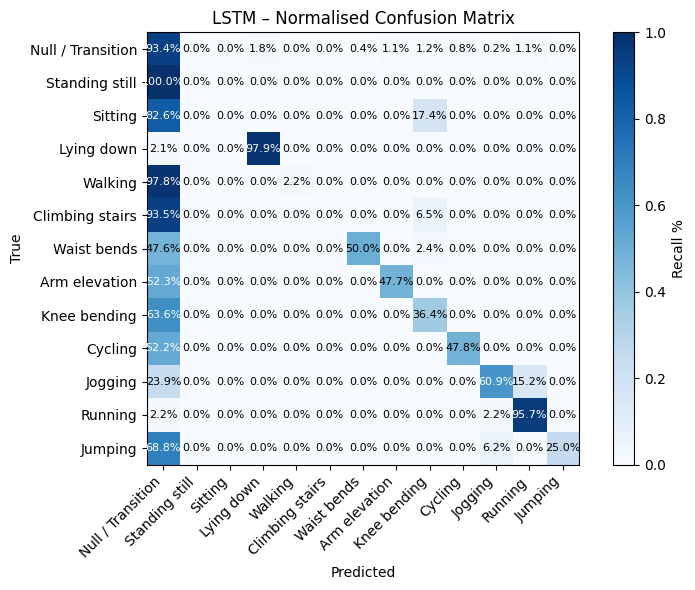

d:\Users\DevinJ\anaconda3\envs\SIT731_pv1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


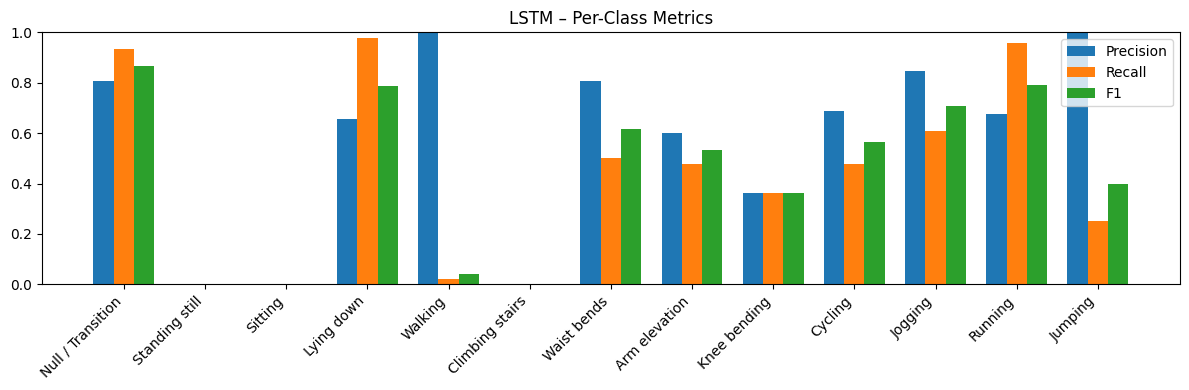

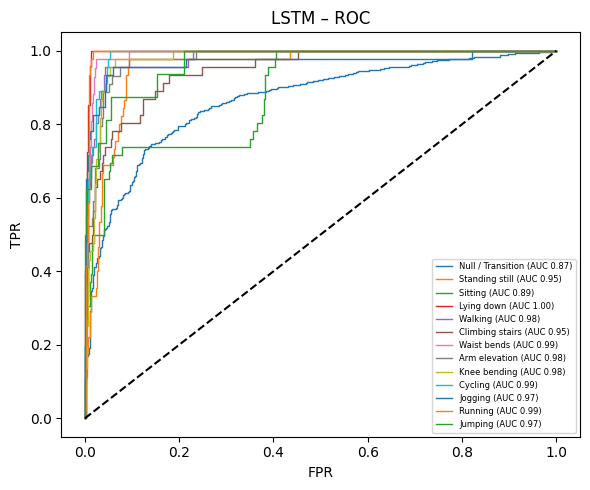

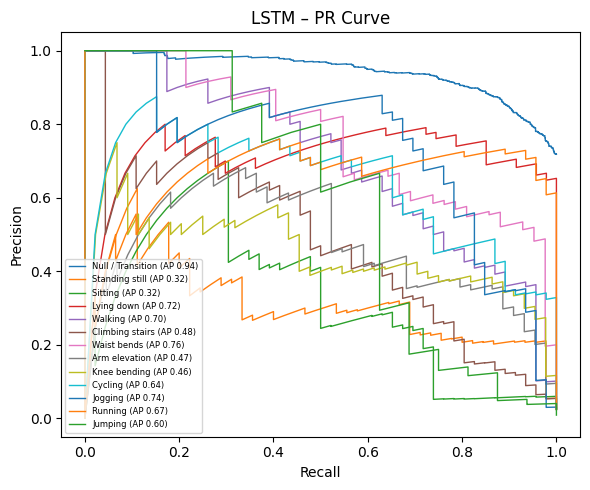

In [16]:
# ===== Enhanced Evaluation for LSTM =====
import torch, numpy as np, matplotlib.pyplot as plt, torch.nn.functional as F
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix,
    precision_recall_fscore_support, roc_curve, auc,
    precision_recall_curve, average_precision_score
)
from sklearn.preprocessing import label_binarize

# --- helper (define once; will be reused by CNN) ---------------------------
def evaluate_model(net, loader, class_names, device, title="Model"):
    net.eval()
    probs_list, preds_list, true_list = [], [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            logits = net(xb)
            probs  = F.softmax(logits, dim=1)
            preds  = logits.argmax(1).cpu()
            probs_list.append(probs.cpu())
            preds_list.extend(preds.numpy())
            true_list.extend(yb.numpy())
    probs = np.concatenate(probs_list, axis=0)
    true  = np.array(true_list)
    preds = np.array(preds_list)

    # Accuracy / Macro-F1
    acc  = accuracy_score(true, preds)
    mf1  = f1_score(true, preds, average="macro")
    print(f"{title}:  accuracy = {acc:.3f}   macro-F1 = {mf1:.3f}")

    # Confusion matrix (row-normalised)
    cm    = confusion_matrix(true, preds, labels=range(len(class_names)))
    cm_n  = cm.astype(float) / cm.sum(axis=1, keepdims=True)
    ticks = np.arange(len(class_names))
    plt.figure(figsize=(8,6))
    plt.imshow(cm_n, cmap="Blues"); plt.colorbar(label="Recall %")
    plt.title(f"{title} – Normalised Confusion Matrix")
    plt.xticks(ticks, class_names, rotation=45, ha="right")
    plt.yticks(ticks, class_names)
    for i in range(cm_n.shape[0]):
        for j in range(cm_n.shape[1]):
            txt = f"{cm_n[i,j]*100:.1f}%"
            clr = "white" if cm_n[i,j] > 0.5 else "black"
            plt.text(j,i,txt,ha="center",va="center",color=clr,fontsize=8)
    plt.xlabel("Predicted"); plt.ylabel("True"); plt.tight_layout(); plt.show()

    # Per-class Precision / Recall / F1
    prec, rec, f1, _ = precision_recall_fscore_support(true, preds, labels=range(len(class_names)))
    x = np.arange(len(class_names)); w=0.25
    plt.figure(figsize=(12,4))
    plt.bar(x-w, prec, w, label="Precision")
    plt.bar(x,   rec,  w, label="Recall")
    plt.bar(x+w, f1,   w, label="F1")
    plt.xticks(x, class_names, rotation=45, ha="right")
    plt.ylim(0,1); plt.legend(); plt.title(f"{title} – Per-Class Metrics")
    plt.tight_layout(); plt.show()

    # ROC & PR curves (one-vs-rest)
    y_bin = label_binarize(true, classes=range(len(class_names)))
    plt.figure(figsize=(6,5))
    for i, c in enumerate(class_names):
        fpr,tpr,_ = roc_curve(y_bin[:,i], probs[:,i])
        plt.plot(fpr,tpr,label=f"{c} (AUC {auc(fpr,tpr):.2f})", linewidth=1)
    plt.plot([0,1],[0,1],'k--'); plt.xlabel("FPR"); plt.ylabel("TPR")
    plt.title(f"{title} – ROC"); plt.legend(fontsize=6); plt.tight_layout(); plt.show()

    plt.figure(figsize=(6,5))
    for i, c in enumerate(class_names):
        pr,re,_ = precision_recall_curve(y_bin[:,i], probs[:,i])
        ap = average_precision_score(y_bin[:,i], probs[:,i])
        plt.plot(re,pr,label=f"{c} (AP {ap:.2f})", linewidth=1)
    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.title(f"{title} – PR Curve"); plt.legend(fontsize=6); plt.tight_layout(); plt.show()

# --- run helper on the trained LSTM model -------------------------------
evaluate_model(model, test_loader, class_names, device, title="LSTM")


In [20]:
test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


Test Loss: 0.5643, Test Accuracy: 0.7823


In [65]:
class_names = [
    "Null/Transitional",   # label 0
    "Standing still",      # label 1
    "Sitting & relaxing",  # label 2
    "Lying down",          # label 3
    "Walking",             # label 4
    "Climbing stairs",     # label 5
    "Waist bends forward", # label 6
    "Frontal elev. arms",  # label 7
    "Knees bending",       # label 8
    "Cycling",             # label 9
    "Jogging",             # label 10
    "Running",             # label 11
    "Jump front/back",     # label 12
]
from sklearn.metrics import classification_report, confusion_matrix

print("Detailed Classification Report with Activity Names:\n")
print(classification_report(all_labels, all_preds, target_names=class_names))


Detailed Classification Report with Activity Names:

                     precision    recall  f1-score   support

  Null/Transitional       0.82      0.92      0.87      1310
     Standing still       0.00      0.00      0.00        45
 Sitting & relaxing       0.00      0.00      0.00        46
         Lying down       0.69      0.98      0.81        47
            Walking       0.92      0.24      0.38        46
    Climbing stairs       0.72      0.28      0.41        46
Waist bends forward       0.70      0.55      0.61        42
 Frontal elev. arms       0.48      0.45      0.47        44
      Knees bending       0.68      0.48      0.56        44
            Cycling       0.57      0.63      0.60        46
            Jogging       0.73      0.70      0.71        46
            Running       0.72      0.96      0.82        46
    Jump front/back       0.50      0.06      0.11        16

           accuracy                           0.79      1824
          macro avg       0.58

d:\Users\DevinJ\anaconda3\envs\SIT731_pv1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Users\DevinJ\anaconda3\envs\SIT731_pv1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Users\DevinJ\anaconda3\envs\SIT731_pv1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

# CNN Model Definition & Training Loop
Construct a 1-D CNN architecture with three convolutional blocks and global average pooling.

Optimise the CNN with class-weighted cross-entropy and monitor epoch-by-epoch performance.

In [21]:
# ----- 1. PyTorch Dataset wrapper -----
from torch.utils.data import Dataset, DataLoader
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

class SensorDataset(Dataset):
    def __init__(self, X, y):
        # CNN expects (batch, channels, length)
        self.X = torch.tensor(np.transpose(X, (0, 2, 1)), dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):    return len(self.X)
    def __getitem__(self, i): return self.X[i], self.y[i]

train_ds = SensorDataset(X_train, y_train)
val_ds   = SensorDataset(X_val,   y_val)
test_ds  = SensorDataset(X_test,  y_test)

BATCH = 64
train_dl = DataLoader(train_ds, batch_size=BATCH, shuffle=True)
val_dl   = DataLoader(val_ds,   batch_size=BATCH, shuffle=False)
test_dl  = DataLoader(test_ds,  batch_size=BATCH, shuffle=False)

# ----- 2. 1-D CNN model -----
import torch.nn as nn, torch.optim as optim

class CNN1DMHealth(nn.Module):
    def __init__(self, in_ch, n_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv1d(in_ch, 64,  3, padding=1), nn.ReLU(), nn.BatchNorm1d(64),
            nn.Conv1d(64,   128, 3, padding=1), nn.ReLU(), nn.BatchNorm1d(128),
            nn.MaxPool1d(2),                     # L -> L/2

            nn.Conv1d(128, 256, 3, padding=1), nn.ReLU(), nn.BatchNorm1d(256),
            nn.MaxPool1d(2),                    # L/2 -> L/4

            nn.AdaptiveAvgPool1d(1),            # -> (B,256,1)
            nn.Flatten(),                       # -> (B,256)
            nn.Dropout(0.3),
            nn.Linear(256, n_classes)
        )
    def forward(self, x): return self.net(x)

n_feat   = X_train.shape[2]
n_class  = len(np.unique(y_train))
model    = CNN1DMHealth(n_feat, n_class)
device   = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# ----- 3. Loss (with class weights) & optimiser -----
weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
criterion = nn.CrossEntropyLoss(weight=torch.tensor(weights, dtype=torch.float32).to(device))
optimiser = optim.Adam(model.parameters(), lr=1e-3)

# ----- 4. Train / validate -----
def run_epoch(loader, train=True):
    model.train() if train else model.eval()
    total_loss = correct = total = 0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        if train: optimiser.zero_grad()
        with torch.set_grad_enabled(train):
            out = model(xb)
            loss = criterion(out, yb)
            if train:
                loss.backward()
                optimiser.step()
        total_loss += loss.item() * xb.size(0)
        correct    += (out.argmax(1) == yb).sum().item()
        total      += yb.size(0)
    return total_loss/total, correct/total

EPOCHS = 10
for ep in range(1, EPOCHS+1):
    tr_loss, tr_acc = run_epoch(train_dl, True)
    vl_loss, vl_acc = run_epoch(val_dl,   False)
    print(f"Ep {ep:02d} | Train {tr_loss:.4f}/{tr_acc:.3f} | Val {vl_loss:.4f}/{vl_acc:.3f}")

# ----- 5. Test & metrics -----
model.eval()
all_p, all_t = [], []
with torch.no_grad():
    for xb, yb in test_dl:
        p = model(xb.to(device)).argmax(1).cpu()
        all_p.extend(p.numpy());  all_t.extend(yb.numpy())

print("\nClassification Report:\n", classification_report(all_t, all_p))
print("Confusion Matrix:\n", confusion_matrix(all_t, all_p))

Ep 01 | Train 0.5930/0.381 | Val 0.2504/0.604
Ep 02 | Train 0.2301/0.653 | Val 0.1776/0.733
Ep 03 | Train 0.1743/0.745 | Val 0.1444/0.773
Ep 04 | Train 0.1404/0.781 | Val 0.1232/0.790
Ep 05 | Train 0.1367/0.794 | Val 0.1129/0.794
Ep 06 | Train 0.1171/0.813 | Val 0.1089/0.816
Ep 07 | Train 0.1112/0.824 | Val 0.1014/0.826
Ep 08 | Train 0.0994/0.842 | Val 0.0979/0.839
Ep 09 | Train 0.0996/0.841 | Val 0.0905/0.866
Ep 10 | Train 0.0923/0.848 | Val 0.0979/0.856

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.78      0.88      1310
           1       0.48      1.00      0.65        45
           2       0.67      1.00      0.80        46
           3       0.66      1.00      0.80        47
           4       0.65      0.98      0.78        46
           5       0.60      0.96      0.74        46
           6       0.68      0.98      0.80        42
           7       0.60      1.00      0.75        44
           8       0.56     

In [22]:
print("Unique labels (train):", np.unique(y_train, return_counts=True))
print("Unique labels (val)  :", np.unique(y_val,   return_counts=True))
print("Unique labels (test) :", np.unique(y_test,  return_counts=True))

Unique labels (train): (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64), array([6108,  211,  215,  219,  215,  214,  198,  202,  207,  216,  214,
        216,   74], dtype=int64))
Unique labels (val)  : (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64), array([1309,   45,   46,   47,   46,   46,   43,   43,   45,   46,   46,
         46,   16], dtype=int64))
Unique labels (test) : (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64), array([1310,   45,   46,   47,   46,   46,   42,   44,   44,   46,   46,
         46,   16], dtype=int64))


# CNN Evaluation
Produce test-set metrics (classification_report, confusion_matrix) for the CNN model.

CNN:  accuracy = 0.837   macro-F1 = 0.778


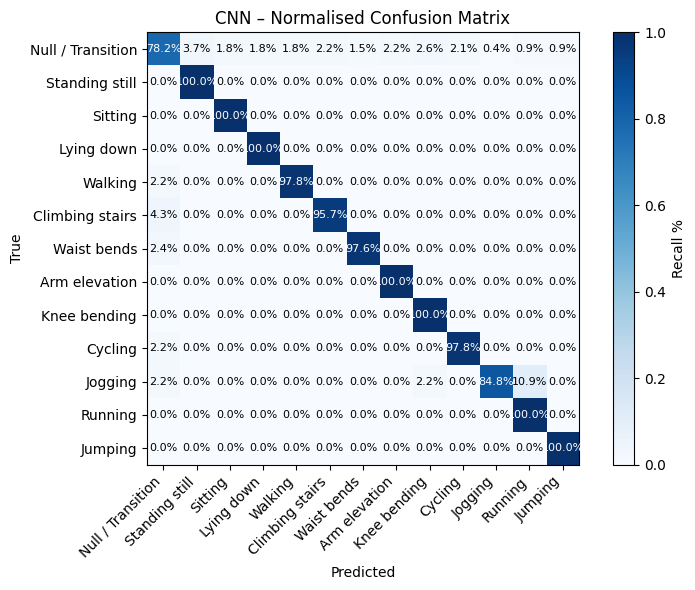

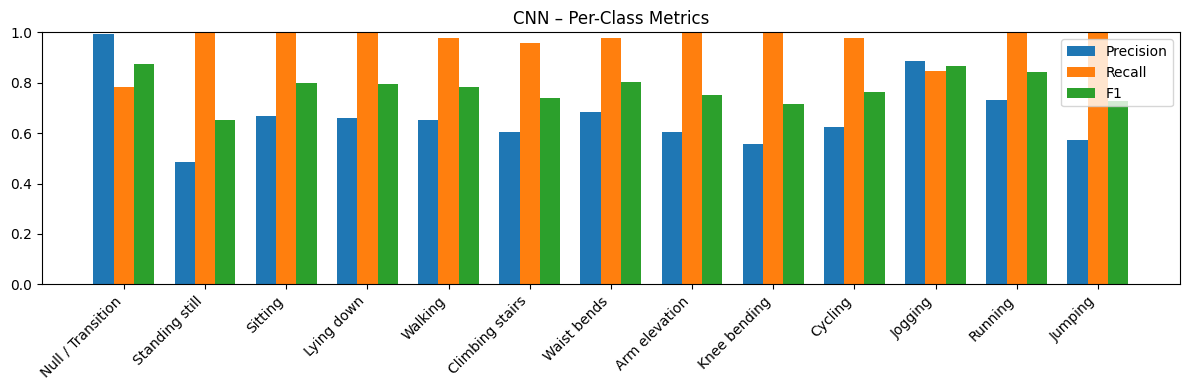

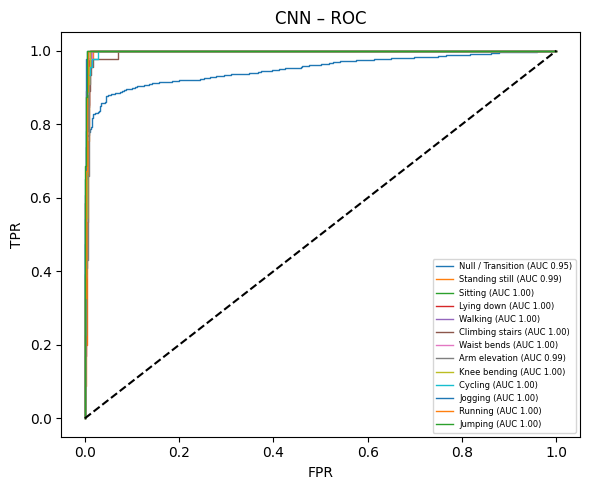

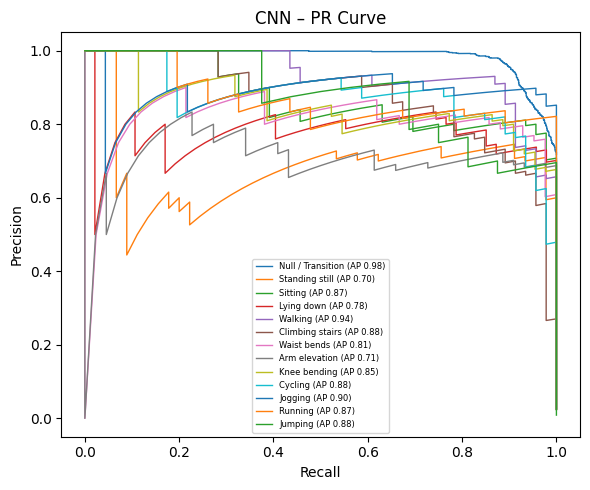

In [23]:
# ===== Enhanced Evaluation for CNN =====
# 'model' is now the trained CNN; 'test_dl' is the DataLoader; class_names & device already defined
evaluate_model(model, test_dl, class_names, device, title="CNN")


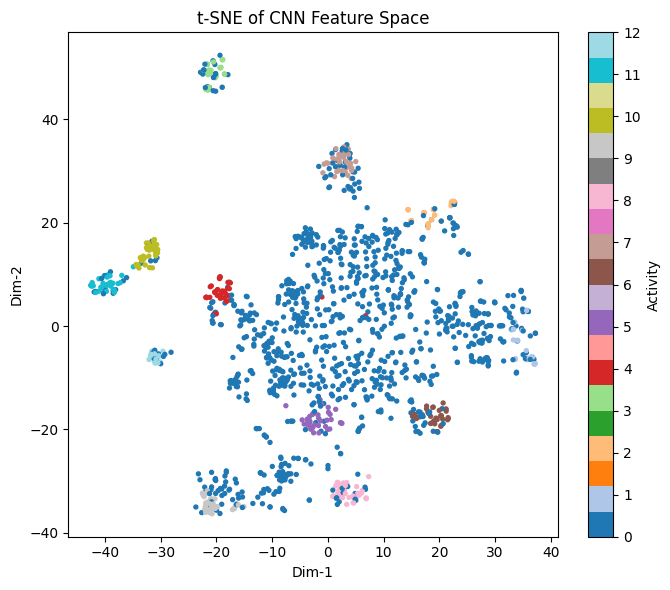

In [ ]:
from sklearn.manifold import TSNE

# 1. Capture features from penultimate layer
model.eval()
features, labels = [], []
with torch.no_grad():
    for xb, yb in test_dl:
        xb = xb.to(device)
        feats = model.net[:-2](xb)        # up to AdaptiveAvgPool (B,256,1)
        feats = feats.squeeze(-1).cpu()   # -> (B,256)
        features.append(feats)
        labels.extend(yb.numpy())
features = torch.cat(features).numpy()

# 2. Run t-SNE on a subset for speed
sample_idx = np.random.choice(len(features), size=1500, replace=False)
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
embed = tsne.fit_transform(features[sample_idx])

# 3. Scatter plot coloured by activity label
plt.figure(figsize=(7,6))
scatter = plt.scatter(embed[:,0], embed[:,1], c=np.array(labels)[sample_idx],
                      cmap='tab20', s=8)
plt.title("t-SNE of CNN Feature Space")
plt.xlabel("Dim-1"); plt.ylabel("Dim-2")
plt.colorbar(scatter, ticks=range(len(class_names)), label="Activity")
plt.tight_layout(); plt.show()
